### Customer Analytics for an Online Retail Store

#### 1. Clean the dataset and make it ready for analytics

In [1]:
import pandas as pd

In [2]:
# Read the csv file in data folder
transaction_df = pd.read_csv('data/transaction_dataset.csv', low_memory=False)

In [3]:
# Displaying the first few rows of the data
transaction_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850.0,536365,15.30,12/1/2010 8:26,United Kingdom
1,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom
2,17850.0,536365,22.00,12/1/2010 8:26,United Kingdom
3,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom
4,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom


In [4]:
# Displaying the shape (number of rows and columns) of the dataframe
transaction_df.shape

(541908, 5)

In [5]:
# Check and count the number of missing values (NaN) in each column of the dataframe
transaction_df.isnull().sum()

CustomerID     135080
InvoiceNo           0
AmountSpent         0
InvoiceDate         0
Country             0
dtype: int64

In [6]:
# Remove rows with missing values (NaN) from the DataFrame
transaction_df.dropna(inplace=True)

In [7]:
# Check for null values
transaction_df.isnull().sum()

CustomerID     0
InvoiceNo      0
AmountSpent    0
InvoiceDate    0
Country        0
dtype: int64

In [8]:
# Displaying information about the DataFrame, including data types, non-null values, and memory usage
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406828 entries, 0 to 541907
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406828 non-null  float64
 1   InvoiceNo    406828 non-null  object 
 2   AmountSpent  406828 non-null  float64
 3   InvoiceDate  406828 non-null  object 
 4   Country      406828 non-null  object 
dtypes: float64(2), object(3)
memory usage: 18.6+ MB


##### Here, there are 3 columns with the data type of object

In [9]:
# Converting InvoiceNo from object to integer
transaction_df['InvoiceNo'] = transaction_df['InvoiceNo'].astype(int)

In [10]:
# Converting InvoiceDate from object to datetime
transaction_df['InvoiceDate'] = pd.to_datetime(transaction_df['InvoiceDate'])

In [12]:
# Converting Country from object to string
transaction_df['Country'] = transaction_df['Country'].astype(str)

In [14]:
# Converting CustomerID from float to integer
transaction_df['CustomerID'] = transaction_df['CustomerID'].astype(int)

In [15]:
# Displaying the first few rows
transaction_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [16]:
# Checking the data types for all the columns
transaction_df.dtypes

CustomerID              int32
InvoiceNo               int32
AmountSpent           float64
InvoiceDate    datetime64[ns]
Country                object
dtype: object

##### All the data are in their appropriate data types

In [17]:
### To check if all the numeric values in the dataframe are proper or not, we will use the describe method
transaction_df.describe()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate
count,406828.000000,406828.000000,406828.000000,406828
mean,15287.694552,560581.737412,20.401913,2011-07-10 16:30:54.475159296
min,12346.000000,536365.000000,-168469.600000,2010-12-01 08:26:00
25%,13953.000000,549130.000000,4.200000,2011-04-06 15:02:00
50%,15152.000000,561873.000000,11.100000,2011-07-31 11:48:00
75%,16791.000000,572065.000000,19.500000,2011-10-20 13:06:00
max,18287.000000,581587.000000,168469.600000,2011-12-09 12:50:00
std,1713.600528,13105.458755,427.592241,NaN


##### The AmountSpent column has a negative column in it, however, such column can only have a positive value that is greater then 0

In [18]:
# Ensure that the 'AmountSpent' column contains only positive values
# by taking the absolute value of each entry
transaction_df['AmountSpent'] = transaction_df['AmountSpent'].abs()

In [19]:
# Let's check the numeric value again
transaction_df.describe()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate
count,406828.000000,406828.000000,406828.000000,406828
mean,15287.694552,560581.737412,23.407303,2011-07-10 16:30:54.475159296
min,12346.000000,536365.000000,0.000000,2010-12-01 08:26:00
25%,13953.000000,549130.000000,4.680000,2011-04-06 15:02:00
50%,15152.000000,561873.000000,11.800000,2011-07-31 11:48:00
75%,16791.000000,572065.000000,19.800000,2011-10-20 13:06:00
max,18287.000000,581587.000000,168469.600000,2011-12-09 12:50:00
std,1713.600528,13105.458755,427.438254,NaN


In [20]:
# Yay! the dataset is now clean. Let's save the cleaned dataset as a new CSV file
transaction_df.to_csv('data/customer_dataset.csv', header=True, index=False)

#### 2. Performing Customer Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read the CSV file as panda dataframe
customer_df = pd.read_csv('data/customer_dataset.csv')

In [4]:
# Displaying the first few rows of the data
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [6]:
# Displaying the number of rows and columns of the dataframe
customer_df.shape

(406828, 5)

##### Let's start analysis by determining how many unique data values are present in each column

In [7]:
# Printing the no of unique data values
customer_df.nunique()

CustomerID      4372
InvoiceNo      22189
AmountSpent     3027
InvoiceDate    20460
Country           37
dtype: int64

##### This dataset hold information of about 4372 customers from 37 different countries

##### Now, let's find the total number of unique customers per country

In [8]:
# Getting the total no of unique customers per country
customer_df.groupby(['Country'])[['CustomerID']].nunique()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


In [9]:
# Assigning variable to the total number of unique customers per country
df_country = customer_df.groupby(['Country'])[['CustomerID']].nunique()

In [10]:
# Renaming the column names
df_country.columns = ['no_of_customers']

# Sorting the dataset based on number of customers
df_country = df_country.sort_values('no_of_customers', ascending=False)

# Displaying the first few rows
df_country.head()

,no_of_customers
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25


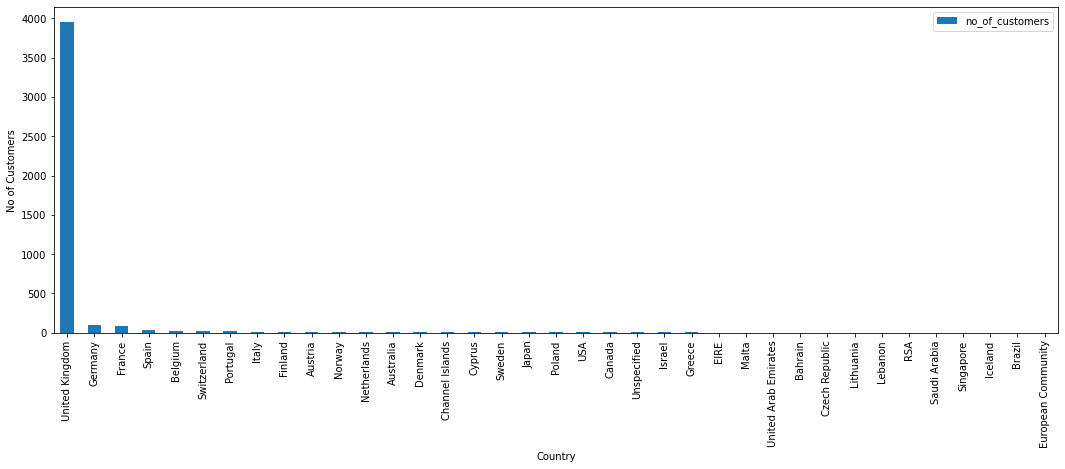

In [12]:
# Visualizing the number of customers per country in a bar plot
# Plotting a bar plot
df_country.plot(kind='bar', figsize = (18, 6))
plt.ylabel('No of Customers')
plt.show()

##### How the customers are generating revenue by calculating the total amount of transaction per month

In [14]:
# Displaying the first few rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [15]:
# Getting only the year and month from the InvoiceDate column
pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
406823    2011-12
406824    2011-12
406825    2011-12
406826    2011-12
406827    2011-12
Name: InvoiceDate, Length: 406828, dtype: object

In [18]:
# Assigning the year and month to a new column named "InvoiceYearMonth"
customer_df['InvoiceYearMonth'] = pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

In [19]:
# Displaying the first few rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,InvoiceYearMonth
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom,2010-12
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom,2010-12
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12


In [20]:
# Getting the total revenue per month per year
df_revenue = customer_df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()

In [33]:
# Displaying the first few rows
df_revenue

,AmountSpent
InvoiceYearMonth,
2010-12,590823.760
2011-01,663815.700
2011-02,457728.550
2011-03,611036.910
2011-04,512352.871
2011-05,708938.040
2011-06,714414.220
2011-07,625939.791
2011-08,674319.800


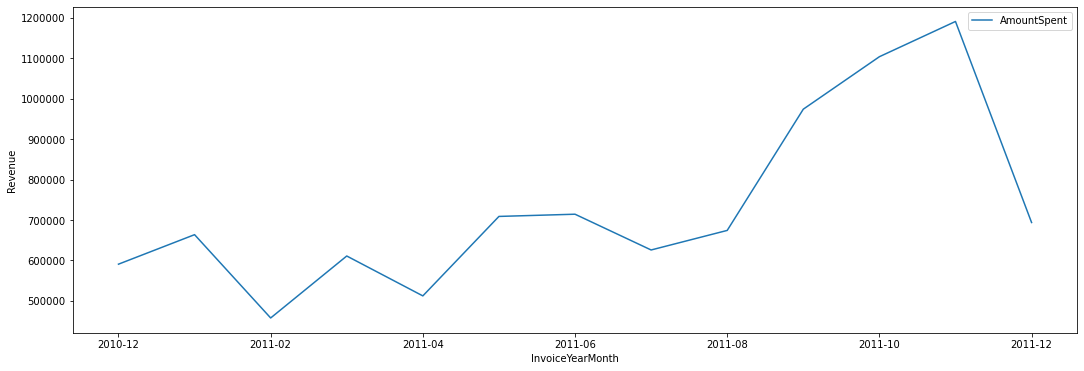

In [24]:
# plotting a line plot
fig, ax = plt.subplots(figsize=(18, 6))

df_revenue.plot(kind='line', ax=ax)

# Disable scientific notation on the y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.ylabel('Revenue')

# Display the plot
plt.show()


##### From the line graph, there is a significant drop of sales in December, 2011. What could cause this?

In [25]:
# Exploring the data further. Checking for the last date data was collected 
customer_df['InvoiceDate'].max()

'2011-12-09 12:50:00'

##### Now we can see that the significant drop was caused by early collection of data in December

##### Finding out how many monthly active customer were present in each month


In [26]:
# Creating monthly active customers
df_monthly_active = customer_df.groupby(['InvoiceYearMonth'])[['CustomerID']].nunique()

In [38]:
# Renaming the column name
df_monthly_active.columns = ['No_of_Unique_Customers']

In [39]:
# Displaying the rows
df_monthly_active

,No_of_Unique_Customers
InvoiceYearMonth,
2010-12,948
2011-01,783
2011-02,798
2011-03,1020
2011-04,899
2011-05,1079
2011-06,1051
2011-07,993
2011-08,980


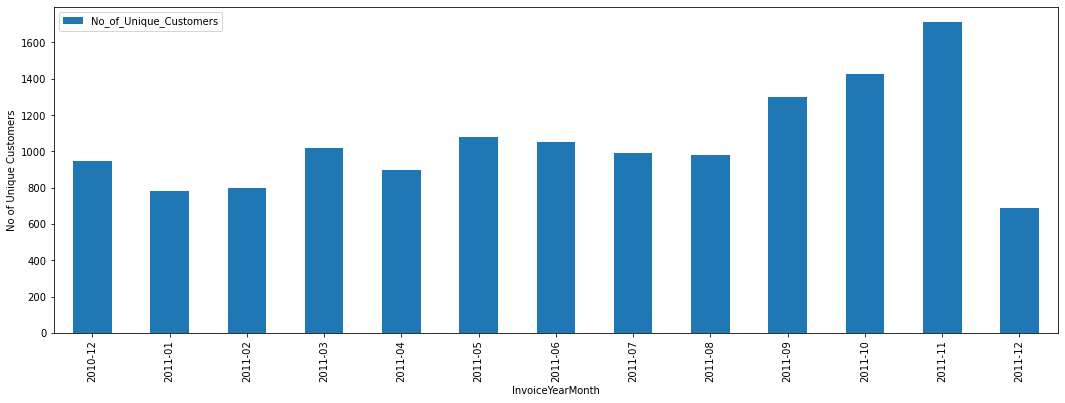

In [40]:
# Plotting a bar plot
df_monthly_active.plot(kind='bar', figsize = (18, 6))
plt.ylabel('No of Unique Customers')
plt.show()

##### Here, the growth of active customers per month follows a similar trend as the growth in total revenue per month. Hence, it can be suggested that the growth of active customers may be the reason behind the growth in total revenue generated per month

##### Checking the correlation between the growth of active customers per month and total revenue per month

In [41]:
# Merge the dataframes based on the common 'InvoiceYearMonth' column
merged_df = pd.merge(df_revenue, df_monthly_active, on='InvoiceYearMonth')

# Calculate the correlation coefficient between AmountSpent and No of Unique Customers
correlation = merged_df['AmountSpent'].corr(merged_df['No_of_Unique_Customers'])

print("Correlation between AmountSpent and No of Unique Customers:", correlation)

Correlation between AmountSpent and No of Unique Customers: 0.8906468235893426


##### There is a strong positive correlation (r = 0.89) between the growth of active customers per month and the growth in total revenue per month. This suggests that increasing active customer base significantly contributes to the observed monthly revenue growth.

##### Checking the impact of customer growth on revenue using regression analysis

In [42]:
# import statsmodels.formula.api as smf

merged_df.head()

,AmountSpent,No_of_Unique_Customers
InvoiceYearMonth,,
2010-12,590823.760,948
2011-01,663815.700,783
2011-02,457728.550,798
2011-03,611036.910,1020
2011-04,512352.871,899


In [ ]:
merged_df.columns

In [43]:
# Define the regression model
model = smf.ols("AmountSpent ~ No_of_Unique_Customers", data=merged_df)

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     42.20
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           4.45e-05
Time:                        18:57:43   Log-Likelihood:                -167.67
No. Observations:                  13   AIC:                             339.3
Df Residuals:                      11   BIC:                             340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3729

C:\Users\DAYO\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



In [44]:
# Extract the coefficient of 'No of Unique Customers'
customer_impact = results.params["No_of_Unique_Customers"]

print("Estimated impact of one additional customer on revenue:", customer_impact)

Estimated impact of one additional customer on revenue: 699.9068635569286


##### This regression analysis provides a valuable statistical insight into the potential impact of customer acquisition on your revenue

#### 3. Finding Recency, Frequency, and Monetary Value of Customers (RFM Analysis)

##### Recency: When did each customer make their last purchase?
##### Frequency: How many times did each customer make a purchase?
##### Monetary Value: How much did each unique customer spend in total?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read the customer_dataset as pandas dataframe
customer_df = pd.read_csv('data/customer_dataset.csv')

In [4]:
# Displaying the first few rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [6]:
# printing the shape of the dataframe
customer_df.shape

(406828, 5)

#### Finding Recency of Customers

##### The first thing to do is to answer the following question - When did each customer make their last purchase? (Recency)

In [7]:
# Sorting the dataframe based on the InvoiceDate column
customer_df.sort_values('InvoiceDate', inplace=True)

##### Now, only keeping the last row of CustomerID data by dropping all rows containing similar CustomerID except the last

In [10]:
user_df = customer_df.drop_duplicates('CustomerID', keep='last').reset_index(drop=True)

In [11]:
# Displaying the first few rows
user_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom


In [12]:
# Finding the recency of each customer in respect to the last date of purchase in the dataset
user_df['Recency'] = pd.to_datetime(user_df['InvoiceDate'].max()) - pd.to_datetime(user_df['InvoiceDate'])

In [13]:
# Displaying the first few rows
user_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,Recency
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom,373 days 02:57:00
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom,373 days 02:13:00
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands,373 days 01:23:00
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom,373 days 01:05:00
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom,373 days 00:47:00


In [14]:
# Extracting only the day value
user_df['Recency'] = user_df['Recency'].dt.days

In [15]:
# Selecting only the customerID and Recency column
user_df = user_df[['CustomerID', 'Recency']]

In [16]:
# Displaying the first few rows
user_df.head()

,CustomerID,Recency
0,18074,373
1,13747,373
2,12791,373
3,17908,373
4,16583,373


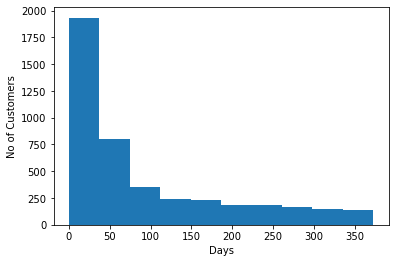

In [19]:
# Plotting the frequency distribution of all days
plt.hist(user_df['Recency'])
plt.ylabel('No of Customers')
plt.xlabel('Days')
plt.show()

##### It can be seen that most customers have made a purchase within the last 50 days. That is, majority of the customers are active.

#### Finding Purchase Frequency of Customers

##### Here, let's answer the following question - How many times did each unique customer make a purchase? (Frequency)

In [21]:
# Displaying the first few rows of customer dataframe
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


##### Counting the number of transaction of each CustomerID gives the number of each customer has made a purchase.

In [23]:
# Getting the frequency distribution of each CustomerID
df_frequency = customer_df['CustomerID'].value_counts().reset_index()

# Renaming the columns
df_frequency.columns = ['CustomerID', 'Frequency']

# Displaying the first few rows
df_frequency.head()

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [24]:
# Merging the df_frequency with user_df based on the common 'CustomerID' column
user_df = pd.merge(user_df, df_frequency, on='CustomerID')

In [25]:
# Displaying the first few rows
user_df.head(10)

,CustomerID,Recency,Frequency
0,18074,373,13
1,13747,373,1
2,12791,373,2
3,17908,373,58
4,16583,373,14
5,17968,373,85
6,14729,373,71
7,14237,372,9
8,15350,372,5
9,15165,372,27


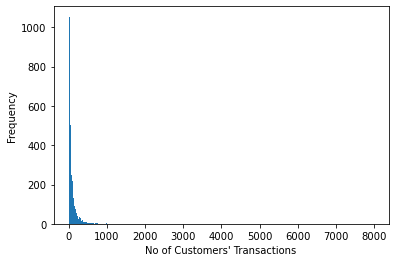

In [29]:
# Plotting the frequency distribution of the frequency
plt.hist(user_df['Frequency'], bins=500)
plt.ylabel('Frequency')
plt.xlabel('No of Customers\' Transactions')
plt.show()

##### Since the histogram is not clearly outlining the outliers, let's make a scatter plot

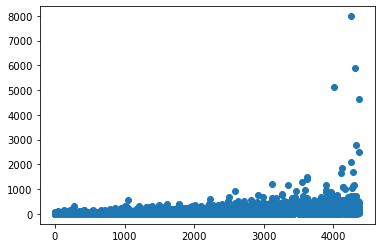

In [30]:
# Plotting the scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Frequency'])

##### From the scatter plot, we can see that most unique customers have made purhases between 1-1000 times, and there are also some outlier customer who have purchased items for more that 1000 times

#### Finding Monetary Value of Customers

##### Here, let's answer the following question - How much did each unique customer spend in total? (Monetary Value)

In [32]:
# Displaying the first few rows of customer's dataframe
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [33]:
# Getting the total amount spent by each customer
df_amount = customer_df.groupby('CustomerID')['AmountSpent'].sum().reset_index()

In [34]:
# Displaying the first few rows
df_amount.head()

,CustomerID,AmountSpent
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [35]:
# Renaming the column name as Revenue
df_amount.columns = ['CustomerID', 'Revenue']
df_amount.head()

,CustomerID,Revenue
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [36]:
# Merging the df_amount with user_df based on the common 'CustomerID' column
user_df = pd.merge(user_df, df_amount, on='CustomerID')

In [37]:
# Displaying the first few rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45


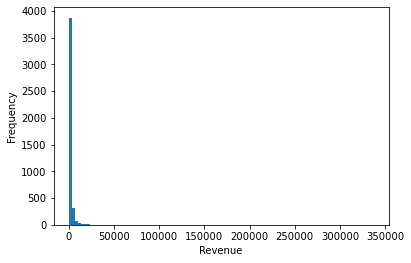

In [39]:
# Plotting the frequency distribution of the totam amount spent
plt.hist(user_df['Revenue'], bins=100)
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.show()

##### Since histogram is not clearly outlining the outliers, let's make a scater plot as well

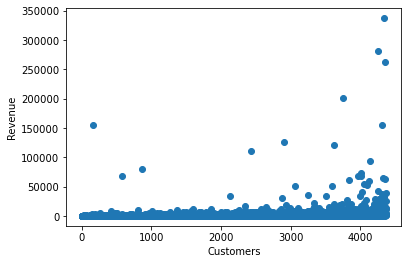

In [41]:
# Plotting a scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Revenue'])
plt.ylabel('Revenue')
plt.xlabel('Customers')
plt.show()

##### From the scatter plot, it can be seen that most customer have made a purchase within the 50,000, and there are some other customers (outlier cases) that have made purchases over 50,000

In [42]:
# Saving the user_df as a new csv file
user_df.to_csv('data/user_dataset.csv', header=True, index=False)

##### Analyzing the correlation between the Recency, Frequency and Monetary Value distribution of all the customers using a correlation matrix

In [44]:
# Calculate the correlation matrix
correlation_matrix = user_df.corr()

# Print the correlation matrix
correlation_matrix

,CustomerID,Recency,Frequency,Revenue
CustomerID,1.000000,0.013687,-0.002785,-0.013250
Recency,0.013687,1.000000,-0.206980,-0.105736
Frequency,-0.002785,-0.206980,1.000000,0.377824
Revenue,-0.013250,-0.105736,0.377824,1.000000


##### Frequency and Revenue have the strongest positive correlation (0.377824), indicating that customers who purchase more frequently tend to spend more overall. This suggests that focusing on strategies to increase purchase frequency could lead to higher revenue.

##### Recency has a weak negative correlation with both Frequency (-0.206980) and Revenue (-0.105736). This implies that customers who purchased more recently might be slightly less likely to purchase frequently or spend a lot. However, these correlations are relatively weak, so the impact of recency might not be substantial.

##### Further analysis, such as segmentation based on RFM values or exploring customer demographics and preferences, could provide more nuanced insights into customer behavior patterns.

#### 4. Customer Profiling and Segmentation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# Read the user dataset as a pandas dataframe
user_df = pd.read_csv('data/user_dataset.csv')

In [3]:
# displaying the first few rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45


In [4]:
# Printing the shape of the DataFrame
user_df.shape

(4372, 4)

##### Here, we will initiate the K-Means clustering algorithm with a total number of 4 clusters

In [5]:
# Building 4 clusters
kmeans = KMeans(n_clusters=4)

#### Segmenting Customers based on Recency

##### Fitting the model object into the recency values in our dataframe

In [6]:
# Fitting the model
kmeans.fit(user_df[['Recency']])

KMeans(n_clusters=4)

##### Predicting the value of clusters and saving them as a new column RecencyCLuster in the dataframe

In [7]:
# Predicting cluster using the fitted model
user_df['RecencyCluster'] = kmeans.predict(user_df[['Recency']])

In [8]:
# Displaying the first few rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster
0,18074,373,13,489.60,1
1,13747,373,1,79.60,1
2,12791,373,2,192.60,1
3,17908,373,58,243.28,1
4,16583,373,14,233.45,1


##### Now, the customers has been segmented based on Recency into 4 different clusters

##### Next, let's see the distribution of data in the 4 clusters

<AxesSubplot:xlabel='RecencyCluster'>

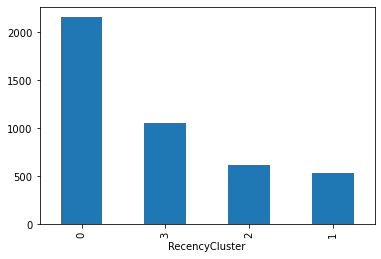

In [9]:
# Plotting the count of data in each cluster
user_df['RecencyCluster'].value_counts().plot.bar()

##### The data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. Hence, let's order them based on their mean values

In [10]:
# Creating a new dataframe by grouping the dataframe based on different cluster values and finding the mean
df_new = user_df.groupby("RecencyCluster")["Recency"].mean().reset_index()

In [11]:
# Displaying the new dataframe
df_new

,RecencyCluster,Recency
0,0,17.397311
1,1,305.363806
2,2,184.598387
3,3,77.814920


In [12]:
# Renaming the Recency column name to RecencyMean
df_new.rename(columns={'Recency': 'RecencyMean'}, inplace=True)
df_new

,RecencyCluster,RecencyMean
0,0,17.397311
1,1,305.363806
2,2,184.598387
3,3,77.814920


In [13]:
# Sorting the values
df_new = df_new.sort_values(by="RecencyMean", ascending=False).reset_index(drop=True)
df_new

,RecencyCluster,RecencyMean
0,1,305.363806
1,2,184.598387
2,3,77.814920
3,0,17.397311


##### Now, we have the required value for scores for each of the cluster in the index of our column. Let's save them as RecencyScore

In [14]:
# Creating a new column called index with the index values
df_new['RecencyScore'] = df_new.index

In [15]:
df_new

,RecencyCluster,RecencyMean,RecencyScore
0,1,305.363806,0
1,2,184.598387,1
2,3,77.814920,2
3,0,17.397311,3


##### Next, let's merge the original user_df with the new dataframe to add the value of Recency score into our dataframe

In [16]:
# Merging the user_df with df_new based on the common 'RecencyCluster' column
df_user = pd.merge(user_df, df_new[["RecencyCluster", "RecencyScore"]], on="RecencyCluster")

# Removing the column for cluster
df_user.drop("RecencyCluster", axis=1, inplace=True)

In [17]:
# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore
0,18074,373,13,489.60,0
1,13747,373,1,79.60,0
2,12791,373,2,192.60,0
3,17908,373,58,243.28,0
4,16583,373,14,233.45,0


##### Reviewing the statistical metrics of the clusters

In [18]:
# Displaying the details of each cluster
df_user.groupby('RecencyScore')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyScore,,,,,,,,
0,536.0,305.363806,40.645494,245.0,268.0,301.0,336.0,373.0
1,620.0,184.598387,32.161271,132.0,156.0,184.0,212.0,244.0
2,1059.0,77.814920,22.830097,48.0,59.0,73.0,93.5,131.0
3,2157.0,17.397311,13.188805,0.0,6.0,16.0,28.0,47.0


#### Segmenting Customers based on Frequency

##### Fitting the model object into the frequency values in our dataframe

In [25]:
# Fitting the model
kmeans.fit(df_user[['Frequency']])

KMeans(n_clusters=4)

##### Predicting the value of clusters and saving them as a new column FrequencyCluster in the dataframe

In [26]:
# Predicting cluster using the fitted model
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

In [28]:
# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyCluster
0,18074,373,13,489.60,0,0
1,13747,373,1,79.60,0,0
2,12791,373,2,192.60,0,0
3,17908,373,58,243.28,0,0
4,16583,373,14,233.45,0,0


##### Now, the customers has been segmented based on Recency into 4 different clusters

##### Next, let's see the distribution of data in the 4 clusters

<AxesSubplot:xlabel='FrequencyCluster'>

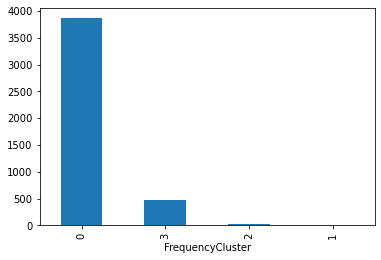

In [29]:
# Plotting the count of data in each cluster
df_user['FrequencyCluster'].value_counts().plot.bar()

##### The data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. Hence, let's order them based on their mean values

In [30]:
# Ordering cluster numbers
def order_cluster(cluster_name, column_name, df, ascending):
    """
    Order clusters based on their mean value
    """
    
    # Creating a new dataframe by grouping the dataframe based on different cluster values and finding the mean
    df_new = df.groupby(cluster_name)[column_name].mean().reset_index()
    
    # Sorting the values
    df_new = df_new.sort_values(by=column_name, ascending=ascending).reset_index(drop=True)
    
    # Creating a new column with the index values as Score
    new_column = column_name + "Score"
    df_new[new_column] = df_new.index
    
    # Creating a final dataframe by merging our original dataframe and the new dataframe
    df_final = pd.merge(df, df_new[[cluster_name, new_column]], on=cluster_name)
    
    # Removing the column for cluster
    df_final.drop(cluster_name, axis=1, inplace=True)
    
    return df_final   
    
    

In [31]:
# Ordering the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency', df_user, True)

In [32]:
# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore
0,18074,373,13,489.60,0,0
1,13747,373,1,79.60,0,0
2,12791,373,2,192.60,0,0
3,17908,373,58,243.28,0,0
4,16583,373,14,233.45,0,0


##### Reviewing the statistical metrics of the clusters

In [33]:
# Displaying the details of each cluster
df_user.groupby('FrequencyScore')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyScore,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,482.0,329.105809,132.667903,190.0,228.0,286.0,393.5,803.0
2,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
3,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0


#### Segmenting Customers based on Revenue

##### Fitting the model object into the revenue values in our dataframe

In [34]:
# Fitting the model
kmeans.fit(df_user[['Revenue']])

KMeans(n_clusters=4)

##### Predicting the value of clusters and saving them as a new column RevenueCluster in the dataframe

In [35]:
# Predicting cluster using the fitted model
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])

In [36]:
# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore,RevenueCluster
0,18074,373,13,489.60,0,0,0
1,13747,373,1,79.60,0,0,0
2,12791,373,2,192.60,0,0,0
3,17908,373,58,243.28,0,0,0
4,16583,373,14,233.45,0,0,0


##### Now, the customers has been segmented based on Revenue into 4 different clusters

##### Next, let's see the distribution of data in the 4 clusters

<AxesSubplot:xlabel='RevenueCluster'>

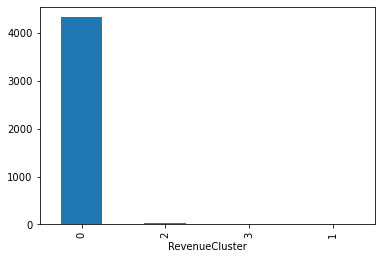

In [37]:
# Plotting the count of data in each cluster
df_user['RevenueCluster'].value_counts().plot.bar()

##### The data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. Hence, let's order them using "order_cluster" function

In [38]:
# Ordering the frequency cluster
df_user = order_cluster('RevenueCluster', 'Revenue', df_user, True)

In [39]:
# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore,RevenueScore
0,18074,373,13,489.60,0,0,0
1,13747,373,1,79.60,0,0,0
2,12791,373,2,192.60,0,0,0
3,17908,373,58,243.28,0,0,0
4,16583,373,14,233.45,0,0,0


##### Reviewing the statistical metrics of the clusters

In [40]:
# Displaying the details of each cluster
df_user.groupby('RevenueScore')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueScore,,,,,,,,
0,4333.0,1463.977051,2287.153138,0.00,307.160,669.14,1638.53,21834.77
1,29.0,46034.246897,16436.726540,26205.97,32367.280,40894.95,60681.72,79183.50
2,7.0,137657.041429,35791.104561,93999.38,116216.095,126103.61,154722.35,201619.41
3,3.0,293580.410000,38621.235867,262876.11,271899.565,280923.02,308932.56,336942.10


##### Finally, let's combine all the three values of score to compute the Overall RFM Score of each of the customers

In [41]:
# Calculating the overall score
df_user['OverallRFMScore'] = df_user['RecencyScore'] + df_user['FrequencyScore'] + df_user['RevenueScore']

##### Let's see the range of our Overall RFM Score

In [42]:
# Printing the unique elements
df_user['OverallRFMScore'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

##### There are 9 different scores for our data. Also, let's see the data distributin in these scores

<AxesSubplot:xlabel='OverallRFMScore'>

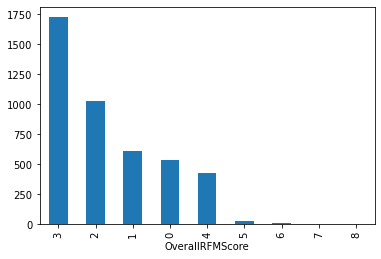

In [43]:
# Plotting a bar plot
df_user['OverallRFMScore'].value_counts().plot.bar()

In [45]:
# Grouping the OverallRFMScore column and getting the mean
df_user.groupby('OverallRFMScore')[['Recency', 'Frequency', 'Revenue']].mean()

,Recency,Frequency,Revenue
OverallRFMScore,,,
0,305.335835,22.223265,391.072927
1,185.136808,33.646580,628.201435
2,78.973735,47.052529,1261.142414
3,20.210313,71.219583,1442.585186
4,12.434272,329.495305,5796.577254
5,6.448276,880.620690,21600.481379
6,9.000000,1057.000000,122375.858750
7,2.500000,3447.000000,105244.833333
8,0.500000,3994.000000,218000.260000


##### According to the bar plot and mean table, it is evident that the majority of the data values seem to have a RFM Score of 3, followed by 2 and 1

##### - A low RFM Score means that the customers have a low value of recency, are less frequent, and generate low revenue
##### - A high RFM Score means that the customers have a high value of recency, are more frequent, and generate higher revenue

#### Segmenting Customers based on Overall RFM Score

Let's segment the customer into three groups based on overall RFM Score

* Low-value
* Mid-value
* High-value

In [46]:
# Segmenting the customers based on overall score
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallRFMScore']>2, 'Segment'] = 'Mid-Value'
df_user.loc[df_user['OverallRFMScore']>4, 'Segment'] = 'High-Value'

<AxesSubplot:xlabel='Segment'>

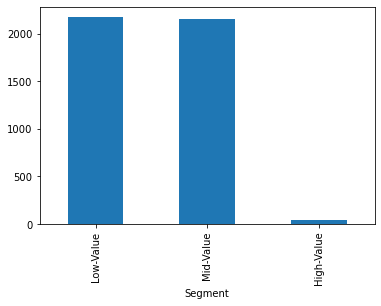

In [47]:
# Plotting a bar plot
df_user['Segment'].value_counts().plot.bar()

##### It can be seen that we have a large amount of low and mid-value customers but very less amount of high-value customers. This segmentation can help us determine the kind of strategies and approaches needed for improving sales and profit, which will allow us to increase the number of high-value customers and their retention

##### Let's plot the customer groups and view their segmentations visually

#### Frequency vs. Revenue

Text(0, 0.5, 'Revenue')

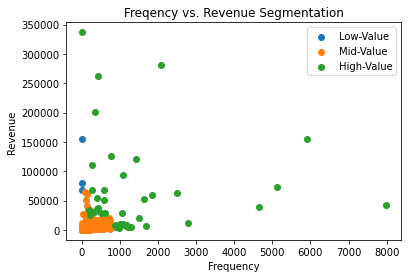

In [51]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Frequency'],
            y=df_user.query("Segment == 'Low-Value'")['Revenue'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Frequency'],
            y=df_user.query("Segment == 'Mid-Value'")['Revenue'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Frequency'],
            y=df_user.query("Segment == 'High-Value'")['Revenue'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Freqency vs. Revenue Segmentation")
plt.xlabel("Frequency")
plt.ylabel("Revenue")

#### Recency vs. Revenue

Text(0, 0.5, 'Revenue')

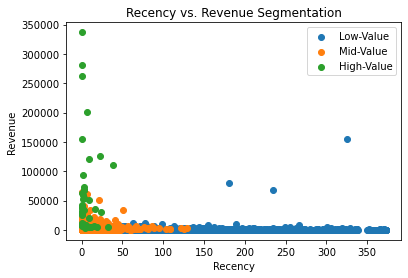

In [53]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
            y=df_user.query("Segment == 'Low-Value'")['Revenue'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
            y=df_user.query("Segment == 'Mid-Value'")['Revenue'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
            y=df_user.query("Segment == 'High-Value'")['Revenue'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Recency vs. Revenue Segmentation")
plt.xlabel("Recency")
plt.ylabel("Revenue")

#### Recency vs. Frequency

Text(0, 0.5, 'Frequency')

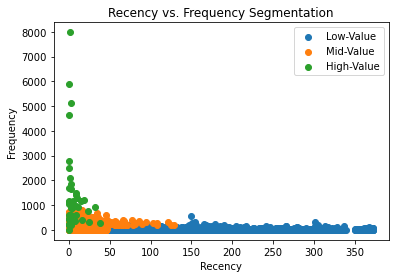

In [54]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
            y=df_user.query("Segment == 'Low-Value'")['Frequency'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
            y=df_user.query("Segment == 'Mid-Value'")['Frequency'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
            y=df_user.query("Segment == 'High-Value'")['Frequency'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Recency vs. Frequency Segmentation")
plt.xlabel("Recency")
plt.ylabel("Frequency")

#### Revenue vs. Frequency

Text(0, 0.5, 'Frequency')

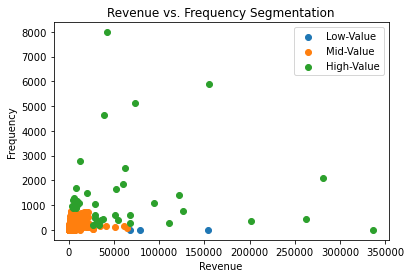

In [55]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Revenue'],
            y=df_user.query("Segment == 'Low-Value'")['Frequency'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Revenue'],
            y=df_user.query("Segment == 'Mid-Value'")['Frequency'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Revenue'],
            y=df_user.query("Segment == 'High-Value'")['Frequency'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Revenue vs. Frequency Segmentation")
plt.xlabel("Revenue")
plt.ylabel("Frequency")

##### We have successfully segmented our customers and these segments can now help us in various processes of building the business such as sales and marketing

In [56]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
